# Fourier de transformation distincte

La transformation de Fourier est utilisée pour analyser la fréquence d'un signal.Les images sont utilisées pour la transformation 2D de Fourier 2D à deux dimensions (DFT) donnée par la relation

$$ f (u, v) = \sum_ {x = 0} ^ {m-1} \sum_ {y = 0} ^ {n-1} f (x, y) e ^ {- j2π (ux / m+ Vy / n)} \; (1) $$

où $ f (x, y) $ est une image dimensionnelle numérique mxn.L'équation (1) doit être calculée pour les valeurs des variables distinctes $u$ v $v$ dans les zones de $ u = 0,1,2, \cdots, m-1 $ et $ v = 0,1,2, \cdots, n-1 $.

Si nous connaissons la transformation $ f (u, v), nous pouvons calculer la fonction $ f (x, y) en utilisant la transformation 2D de Fourier à deux dimensions inverse (IDFT)
$$ f (x, y) = \frac {1} {mn} \sum_ {u = 0} ^ {m-1} \sum_ {v = 0} ^ {n-1} f (u, v) e^ {- j2π (ux / m + vy / n)} \; (2) $$

Pour les valeurs des variables distinctes $ x $ et $ y $ à $ x = 0,1,2, \cdots, m-1 $ et $ y = 0,1,2, \cdots, n-1 $.

Les équations (1) et (2) sont la paire de transformations de Fourier à deux dimensions.

## Spectre de Fourier et angle de phase

La transformation de Fourier est dans la quantité complexe du cas général, il peut donc être exprimé dans les coordonnées polaires comme suit:

$$ f (u, v) = | f (u, v) | e ^ {jφ (u, v)} \; (3) $$

par mesure: $ | f (u, v) | = [R^2(u,v) + i ^ 2 (u, v)] ^ {1/2} \; (4) $
être appelé *spectre de Fourier* ou *spectre de fréquence*

et quantité: $ φ (u, v) = arctan[\frac{I(u,v)} {r (u, v)}] \; (5) $

être appelé *angle de phase*.

In [2]:
# Import functions and libraries
import numpy as np
from numpy import r_
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy import ndimage
from skimage import data, img_as_float
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray



### Créer une image de test et une application FFT

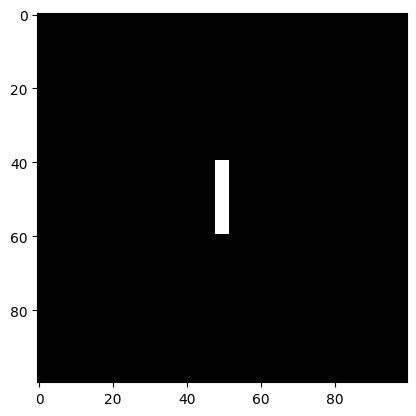

In [3]:
#Initial picture
im = np.zeros((100, 100)) # sample 2D array
im[40:60,48:52]=1

# Display
plt.imshow(im, cmap="gray")
plt.show()

# Calculation of image sizes
imsize = im.shape
height = im.shape[0]
width = im.shape[1]

In [4]:
# Application FFT2 to the entire picture
im_fft=fft2(im)

# Phase spectrum and angle calculation
amplitudeFFT=abs(abs(im_fft))
angleFFT=np.angle(im_fft)

## Propriétés de transformation de Fourier
### 1. Périodicité
La transformation 2D de Fourier 2D à deux dimensions (DFT) et vice versa sont des fonctions périodiques de la durée infinie pendant les variables de 2 $ et $ v $:

$ F (u, v) = f (u + k_ {1} m, v) = f (u, v + k_ {2} n) = f (u + k_ {1} m, v + k_ {2}N) $

et

$ f (x, y) = f (x + k_ {1} m, y) = f (x, y + k_ {2} n) = f (x + k_ {1} m, y + k_ {2}N) $


#! [Figure 1](https://drive.google.com/uc?id=1WqES90pr3TbaiIcdx5UBv4OVfHnk6gNR)

La transformation de Fourier peut être décalée, afin de se concentrer, multipliant la fonction f (x) par $ (-1) ^ x $ avant de calculer la fonction f (u).

! [Figure 2](https://drive.google.com/uc?id=1jPaA2lPad06pcVIbuweC9ZrUL6JRljbP)

De même, 2D DFT, la ligne continue est une base de données $ f (u, v), $ mxn $, résultant de l'équation (1).Ses résultats de déplacement en multipliant $ f (x, y) $ avec le montant de $ (-1) ^ {x + y} $ avant de calculer $ f (u, v) $, nous donne une période complète et centralisée.



In [5]:
# Spectrum
im_ffts=fftshift(im_fft)

Dans la figure 2 (FFT M / S dans l'image d'origine), le spectre de la figure 1 est représenté (image originale)
.

Le principe du système de coordonnées à la fois dans le domaine de l'espace et dans le domaine des fréquences est le coin supérieur gauche.

Comme nous nous y attendions, la zone autour du principe de transformation contient les valeurs les plus élevées.Les angles du panneau de spectre, en raison de la périodicité, contiennent des valeurs élevées similaires (Figure 3. Focus sur le coin supérieur gauche des prix du spectre FFT M / S).

Afin de Cenure le spectre, comme nous l'avons mentionné, nous multiplions $ f (x, y) $ par $ (-1) ^ {x + y} $ avant de calculer $ f (u, v) $.La fonction FFTShift réalise essentiellement ce centre centré, appliquant une transformation logarithmique (1 $ + log | f (u, v) | $) pour afficher la dynamique d'autres tensions dans l'image avec le terme continu dominant dans le spectre (image 4 . Central du spectre FFT).



Text(0.5, 1.0, 'Fig. 5.Image originale de la phase de pato')

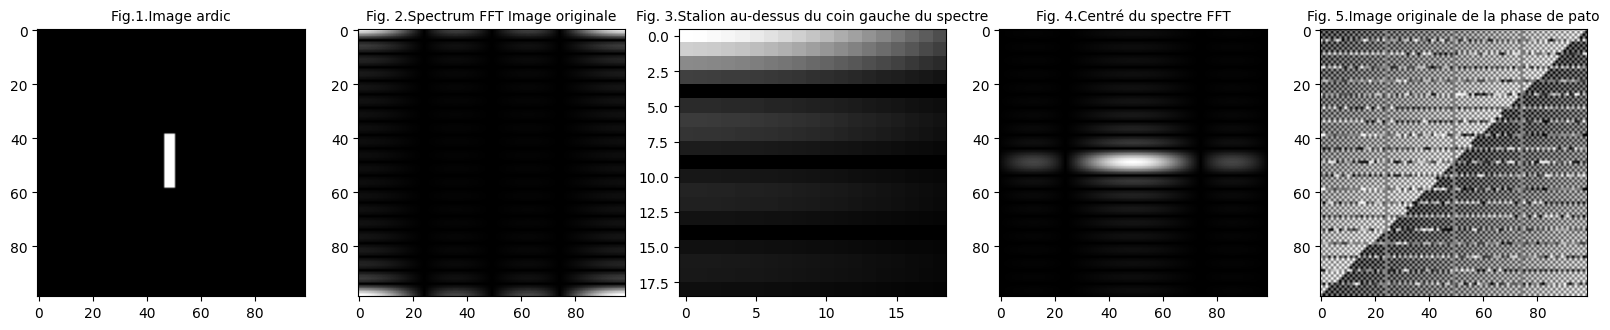

In [6]:
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(abs(im[1:height,1:width]),cmap='gray')
ax0.set_title('Fig.1.Image ardic', fontsize=10)

ax1.imshow(amplitudeFFT[1:height,1:width],cmap='gray')
ax1.set_title('Fig. 2.Spectrum FFT Image originale', fontsize=10)

ax2.imshow(amplitudeFFT[ 1:20,1:20],cmap='gray')
ax2.set_title('Fig. 3.Stalion au-dessus du coin gauche du spectre', fontsize=10)

ax3.imshow(abs(im_ffts[1:height,1:width]),cmap='gray')
ax3.set_title('Fig. 4.Centré du spectre FFT', fontsize=10)

ax4.imshow(angleFFT[1:height,1:width],cmap='gray')
ax4.set_title('Fig. 5.Image originale de la phase de pato', fontsize=10)


Le passage de zéro croisement du spectre est plus proche de la direction verticale, le rectangle qui apparaît sur la figure 1 est plus long de cette adresse que horizontale.

### Shift d'image
Nous déplacerons le rectangle vers l'image et calculerons la transformation de Fourier.

In [7]:
# Shifting picture
imt = np.zeros((100, 100)) # sample 2D array
imt[20:40,68:72]=1

# Image size calculation
imsizet = imt.shape
heightt = imt.shape[0]
widtht = imt.shape[1]

# Calculation FFT (phase and phase angle) 
im_fftt=fft2(imt)
amplitudeFFTΤ=abs(abs(im_fftt))
angleFFTT=np.angle(im_fftt)

#Spectrum
im_fftst=fftshift(im_fftt)

Text(0.5, 1.0, 'Fig. 10.Phase Angle')

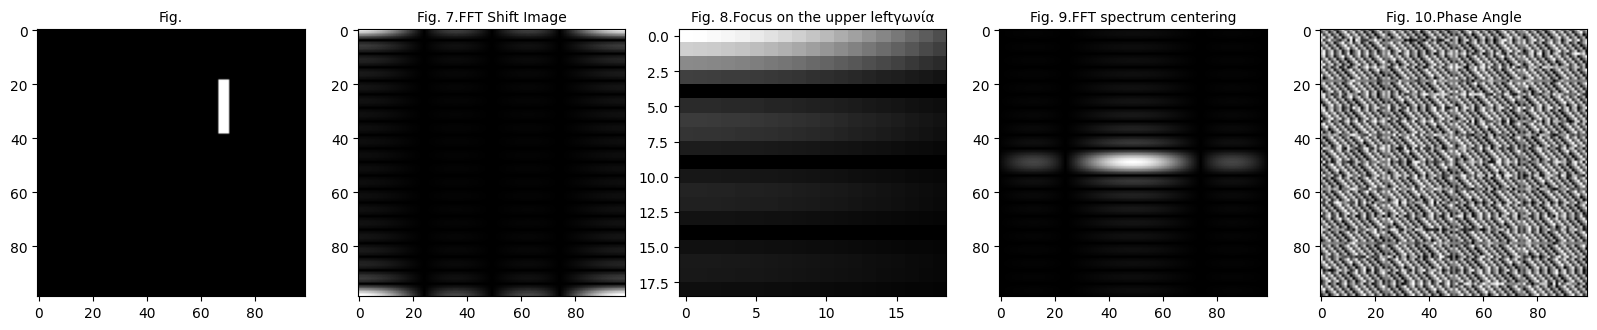

In [8]:
# Imaging

f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(imt[1:height,1:width],cmap='gray')
ax0.set_title('Fig.', fontsize=10)

ax1.imshow(amplitudeFFTΤ[1:height,1:width],cmap='gray')
ax1.set_title('Fig. 7.FFT Shift Image', fontsize=10)

ax2.imshow(amplitudeFFTΤ[1:20,1:20],cmap='gray')
ax2.set_title('Fig. 8.Focus on the upper leftγωνία', fontsize=10)

ax3.imshow(abs(im_fftst[1:height,1:width]),cmap='gray')
ax3.set_title('Fig. 9.FFT spectrum centering', fontsize=10)

ax4.imshow(angleFFTT[1:height,1:width],cmap='gray')
ax4.set_title('Fig. 10.Phase Angle', fontsize=10)


Nous notons que lors du décalage de l'image, le spectre ne change pas (car la valeur absolue du terme exponentielle est égale à l'unité - figure 4 et figure 9).Parce que les images 1 et 6 sont différentes les unes des autres et que leurs lunettes sont les mêmes, alors (selon l'équation 3), leurs angles de phase devraient être différents.En effet, cela est vrai (figure 5 et figure 10).


Ensuite, nous ferons pivoter l'image d'origine de 45 degrés, appliquer la transformation FFT, céder les valeurs du spectre et les visualiser comme précédemment.

In [9]:
# Image rotation
im_45 = ndimage.rotate(im, 45, reshape=False)

# Calculation FFT (phase and phase angle) 
im_fft45=fft2(im_45)
amplitudeFFT45=abs(abs(im_fft45))
angleFFT45=np.angle(im_fft45)

# Spectrum
im_ffts45=fftshift(im_fft45)

Text(0.5, 1.0, 'Fig. 15.Angle de phase')

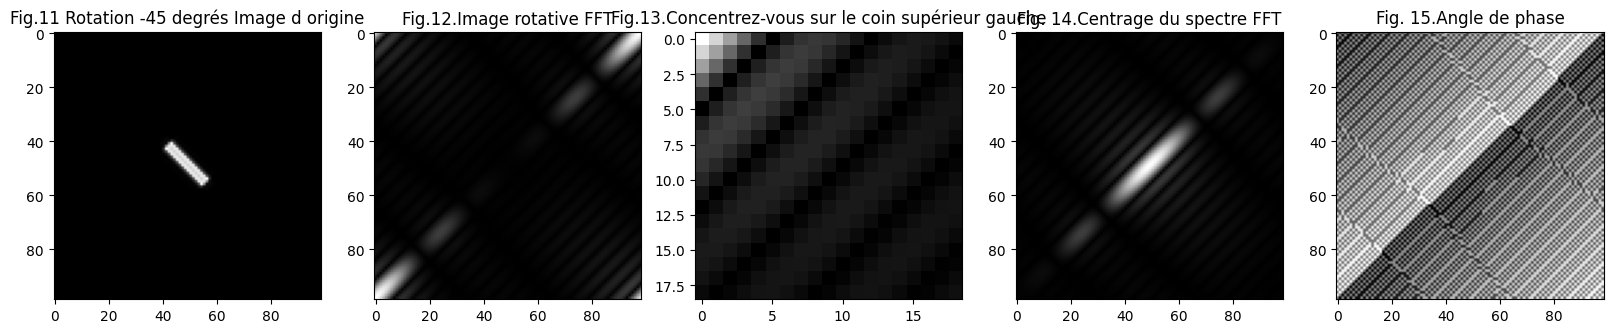

In [10]:
#Απεικονίσεις
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(abs(im_45[1:height,1:width]),cmap='gray')
ax0.set_title('Fig.11 Rotation -45 degrés Image d origine', fontsize=12)

ax1.imshow(amplitudeFFT45[1:height,1:width],cmap='gray')
ax1.set_title('Fig.12.Image rotative FFT', fontsize=12)

ax2.imshow(amplitudeFFT45[1:20,1:20],cmap='gray')
ax2.set_title('Fig.13.Concentrez-vous sur le coin supérieur gauche', fontsize=12)

ax3.imshow(abs(im_ffts45[1:height,1:width]),cmap='gray')
ax3.set_title('Fig. 14.Centrage du spectre FFT', fontsize=12)

ax4.imshow(angleFFT45[1:height,1:width],cmap='gray')
ax4.set_title('Fig. 15.Angle de phase', fontsize=12)

Si l'image d'origine est tournée, par exemple45 degrés Nous observons que son spectre (figure 14) tourne au même angle (par rapport à la figure 4).

En regardant le DFT ou le spectre d'une image (représentant la mesure
de l'image de l'image), nous pouvons identifier de nombreux éléments
À propos de l'image:
* Les zones lumineuses de DFT "image" correspondent aux fréquences
qui ont une large mesure (puissance) dans l'image réelle.
* De grandes valeurs près du centre de la correspondance DFT (décalée)
dans de grandes zones normales de l'image ou sur un fond brillant fort.

## 2.Symétrie
Chaque fonction complexe peut être exprimée comme la somme d'une composante articulaire (symétrique) et inutile (antitrust).

>! [Shape 3](https://drive.google.com/uc?id=1UsnNYOhHvEnBsprAaglaUMiip180cnoW)

La transformation de Fourier d'une fonction réelle est conjugamment symétrique (relation 1 du tableau ci-dessus), ce qui implique que le spectre sera caractérisé par une symétrie parfaite en termes de principe des axes, donc $ f (0,0) = \sum_{x = 0} ^ {m-1} \sum_{y = 0} ^ {n-1} f (x, y) $.

À partir de l'équation (3), il est conclu que le terme correspondant à la fréquence nulle est proportionnel à la valeur moyenne de la fonction $ f $ de $ f (x, y) $: $ f (0,0) = m | \overline {f} ( x, y) | $.

Parce que la proportion de $2$ est une valeur élevée, $ | f (0,0) | $ est, dans la plupart des cas, le plus grand composant du spectre (plusieurs classes de taille par rapport aux autres termes).

Parce que les composants de fréquence u, v sont nuls au début du système de coordonnées, $ f (0,0) $ est appelé **composant cc** de transformation.


In [11]:
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from scipy import ndimage

im=data.camera()

# FFT calculation
imfft=fft2(im)

#Spectrum
im_fftsh=fftshift(imfft)

# Reverse FFT transformation
imifftsh=ifftshift(im_fftsh)
im_ifft=abs(ifft2(imifftsh))

Text(0.5, 1.0, 'Fig. 20.Transformation FFT inversée')

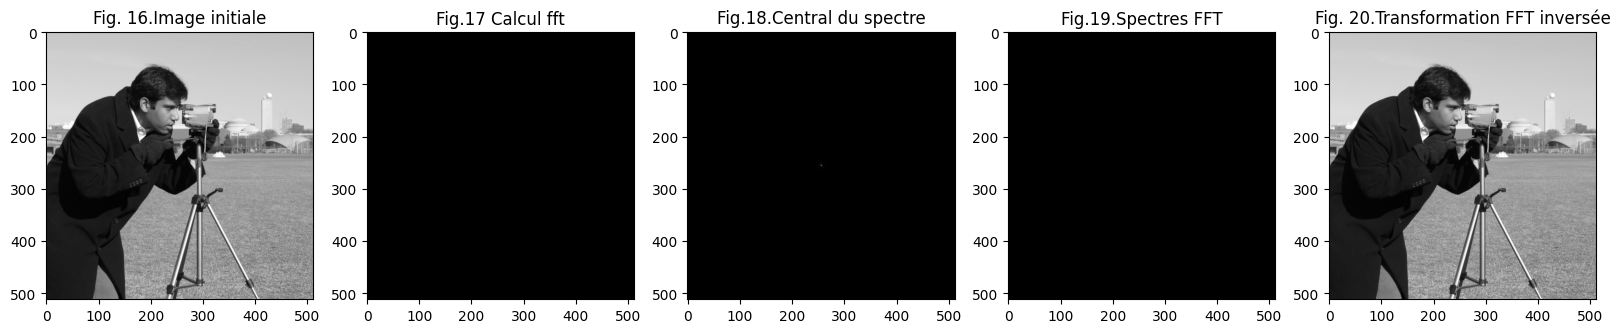

In [13]:
#Illustrations
f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))

ax0.imshow(im,cmap='gray')
ax0.set_title('Fig. 16.Image initiale', fontsize=12)

ax1.imshow(abs(imfft),cmap='gray')
ax1.set_title('Fig.17 Calcul fft', fontsize=12)

ax2.imshow(abs(im_fftsh),cmap='gray')
ax2.set_title('Fig.18.Central du spectre', fontsize=12)

ax3.imshow(abs(imifftsh),cmap='gray')
ax3.set_title('Fig.19.Spectres FFT', fontsize=12)

ax4.imshow(abs(im_ifft),cmap='gray')
ax4.set_title('Fig. 20.Transformation FFT inversée', fontsize=12)



## Propriétés de transformation FFT dans les images réelles

Allez à <a href="https://drive.google.com/file/d/1ywp-cmj1uvzatociiqcd4ddqm1kspnes/view?usp=sharing"> Exercice 1 </a>



### Bibliographie
Chapitre 4. Filtrage dans le domaine des fréquences,

Traitement d'image numérique,

R.Gonzalez & R.Woods Authors, conservateur de traduction: S. Kollias,

Giolas Publications, 4e édition